In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import yfinance as yf

In [1338]:
weight_dict = {'2008-09-24' :0.273, '2014-11-26' : 0.727, '2020-03-06' : np.nan}p

In [ ]:
pred_dict = {}

In [ ]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [187]:
plt.plot(donor5)
plt.show()

In [252]:
COP = yf.Ticker("COP")

In [968]:
COP_dat = COP.history(period="max")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [1208]:
COP_dat.reset_index(inplace = True)

In [1259]:
COP_dat['log_close'] = np.log(COP_dat['Close'])
COP_dat['log_diff'] = COP_dat['log_close'].diff()

In [1312]:
for date in weight_dict.keys():

donor5 = COP_dat.loc[ (COP_dat['Date'] > '2012-11-26') & (COP_dat['Date'] <= '2014-11-30')  ].log_diff
donor5 = donor5.to_numpy()
donor5 = donor5.reshape((donor5.shape[0], 1))

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(donor5)

test = COP_dat.loc[ (COP_dat['Date'] >= '2014-11-28') & (COP_dat['Date'] <= '2014-12-10')  ].Close
test = test.to_numpy()
test = test.reshape((test.shape[0], 1))

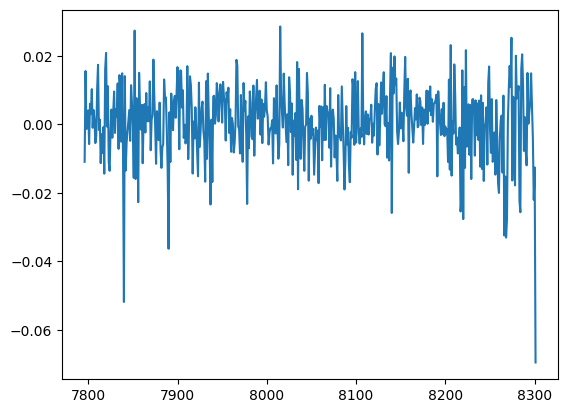

506

In [1322]:
test = scaler.transform(test)

In [1323]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(dataset, look_back)

In [1324]:
testX, testY = create_dataset(test, look_back)

In [1325]:
testX

array([[0.        ],
       [0.96802962],
       [0.92339633],
       [0.94059812],
       [0.49228999],
       [0.49208669],
       [0.27640017]])

In [1326]:
testX.shape

(7, 1)

In [1327]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [1328]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(5, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=88, batch_size=4, verbose=2)

Epoch 1/88


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


126/126 - 0s - 3ms/step - loss: 0.3515
Epoch 2/88
126/126 - 0s - 256us/step - loss: 0.0890
Epoch 3/88
126/126 - 0s - 260us/step - loss: 0.0159
Epoch 4/88
126/126 - 0s - 261us/step - loss: 0.0128
Epoch 5/88
126/126 - 0s - 260us/step - loss: 0.0128
Epoch 6/88
126/126 - 0s - 257us/step - loss: 0.0127
Epoch 7/88
126/126 - 0s - 256us/step - loss: 0.0127
Epoch 8/88
126/126 - 0s - 260us/step - loss: 0.0126
Epoch 9/88
126/126 - 0s - 260us/step - loss: 0.0126
Epoch 10/88
126/126 - 0s - 261us/step - loss: 0.0125
Epoch 11/88
126/126 - 0s - 259us/step - loss: 0.0124
Epoch 12/88
126/126 - 0s - 258us/step - loss: 0.0124
Epoch 13/88
126/126 - 0s - 255us/step - loss: 0.0123
Epoch 14/88
126/126 - 0s - 256us/step - loss: 0.0123
Epoch 15/88
126/126 - 0s - 253us/step - loss: 0.0122
Epoch 16/88
126/126 - 0s - 257us/step - loss: 0.0121
Epoch 17/88
126/126 - 0s - 255us/step - loss: 0.0121
Epoch 18/88
126/126 - 0s - 255us/step - loss: 0.0120
Epoch 19/88
126/126 - 0s - 254us/step - loss: 0.0120
Epoch 20/88
126

In [1329]:
# make predictions
trainPredict = model.predict(trainX)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [1330]:
trainPredict

array([[0.72924495],
       [0.71927047],
       [0.7264878 ],
       [0.72624636],
       [0.7244797 ],
       [0.7278793 ],
       [0.72369295],
       [0.72489643],
       [0.7218257 ],
       [0.72636205],
       [0.72443724],
       [0.7254994 ],
       [0.72779804],
       [0.72711176],
       [0.721853  ],
       [0.7183434 ],
       [0.7265847 ],
       [0.72550875],
       [0.7293353 ],
       [0.72698796],
       [0.7286108 ],
       [0.7263022 ],
       [0.7299808 ],
       [0.7190428 ],
       [0.7164882 ],
       [0.72623706],
       [0.7214301 ],
       [0.7292722 ],
       [0.72981834],
       [0.7267092 ],
       [0.72437936],
       [0.7273183 ],
       [0.7247184 ],
       [0.7221448 ],
       [0.7268703 ],
       [0.72433   ],
       [0.7251923 ],
       [0.7210475 ],
       [0.72827995],
       [0.71987236],
       [0.7216109 ],
       [0.72767156],
       [0.7196087 ],
       [0.7288346 ],
       [0.7276304 ],
       [0.72001994],
       [0.72980005],
       [0.727

In [1331]:
testX.shape

(7, 1, 1)

In [1332]:
testPredict = model.predict(testX)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [1333]:
testX

array([[[0.        ]],

       [[0.96802962]],

       [[0.92339633]],

       [[0.94059812]],

       [[0.49228999]],

       [[0.49208669]],

       [[0.27640017]]])

In [1334]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [1335]:
testPredict.shape

(7, 1)

In [1336]:
testPredict

array([[0.00098109],
       [0.00047128],
       [0.00071508],
       [0.00062283],
       [0.00214965],
       [0.00214986],
       [0.00206605]], dtype=float32)

In [1309]:
testY

array([[49.82816696, 50.88693237, 52.05597305, 50.96044922, 49.88698578,
        47.81357956, 47.76211166]])

In [1310]:
residuals = testY - testPredict

In [1311]:
residuals

array([[ 1.20053864,  2.25930405,  3.42834473,  2.33282089,  1.25935745,
        -0.81404877, -0.86551666],
       [-0.10146332,  0.95730209,  2.12634277,  1.03081894, -0.0426445 ,
        -2.11605072, -2.16751862],
       [-1.20051956, -0.14175415,  1.02728653, -0.0682373 , -1.14170074,
        -3.21510696, -3.26657486],
       [-2.40596771, -1.3472023 , -0.17816162, -1.27368546, -2.3471489 ,
        -4.42055511, -4.47202301],
       [-1.27660751, -0.2178421 ,  0.95119858, -0.14432526, -1.2177887 ,
        -3.29119492, -3.34266281],
       [-0.16265106,  0.89611435,  2.06515503,  0.9696312 , -0.10383224,
        -2.17723846, -2.22870636],
       [ 1.99699402,  3.05575943,  4.22480011,  3.12927628,  2.05581284,
        -0.01759338, -0.06906128]])

In [1117]:
# Weights from Lin and Eck 2021 W∗ = (0.000, 0.000, 0.000, 0.273, 0.727) 

# ("2008-03-14" , "2008-09-05", "2008-09-12", "2008-09-25"  ,"2014-11-26")

# https://arxiv.org/pdf/2008.11756



In [1118]:
trainPredict

array([[ 2.93182151e-04],
       [ 1.97510628e-04],
       [-4.93526284e-04],
       [ 3.02714398e-05],
       [-1.12913665e-03],
       [-2.96893140e-05],
       [-4.93408064e-04],
       [-1.41926212e-04],
       [ 4.71628329e-04],
       [-4.53065644e-04],
       [ 4.53223533e-04],
       [-6.43673848e-05],
       [ 5.72077581e-04],
       [-1.89835016e-04],
       [ 2.54734798e-04],
       [-3.89885012e-04],
       [ 1.19183322e-04],
       [ 1.59838688e-04],
       [ 2.20494883e-04],
       [ 3.70553229e-04],
       [-2.39608763e-03],
       [ 4.55129048e-04],
       [-5.94123812e-05],
       [-4.16596828e-04],
       [-8.17058433e-04],
       [-1.47478067e-05],
       [-7.89818121e-04],
       [ 1.59602234e-04],
       [-8.55731836e-04],
       [-5.41970599e-04],
       [-7.76674307e-04],
       [-6.32440264e-04],
       [-1.80699502e-03],
       [ 7.26666709e-04],
       [-2.11399677e-03],
       [ 1.37803238e-03],
       [-2.36518937e-03],
       [-3.65868036e-04],
       [-7.6

In [1255]:
# LSTM for international airline passengers problem with memory
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
    
# fix random seed for reproducibility
tf.random.set_seed(7)

# load the dataset
dataset = donor5
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()
    
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: Unrecognized keyword arguments passed to LSTM: {'batch_input_shape': (1, 3, 1)}